<!DOCTYPE html>
<html>
<head>
<title>Team 3_MBAN 2_Computational Data Analytics with Python_A2: Production Prediction</title>
</head>
<body>
<h1>A2: Team Assignment</h1>
<p><strong>Name:</strong> Joo Han, Jasmine I-Ling Chiu, Ilora Bandyopadhyay, Sumaiya Abdullahi Rage, Awale Abdi, Varma K. S. K.</p>
<p><strong>Date:</strong> 02/21/2024</p>
<p><strong>Course:</strong> Computational Data Analytics with Python</p>
<p><strong>Program:</strong> MBAN (Cohort 2)</p>
<p><strong>School:</strong> Hult International Business School Boston</p>
</ol>
</body>
</html>

## Business Problem

### Problem statement: How can we predict the oil/gas production

Predicting oil and gas is a critical assessment which can strongly impact the stakeholders involved in the energy sector. The prediction of accurate production forecasts is pivotal and plays significance in an industry for investment decisions, resource management and design strategies to mitigate risk.


### Understanding

Why is predicting oil and gas production important:
- Resource Management: Accurate predictions help in efficient management of hydrocarbon resources, ensuring optimal recovery and minimizing waste. Companies need reliable production forecasts for planning daily operations, maintenance schedules, and workforce requirements.
- Investment Decisions: Investors and stakeholders rely on production forecasts for making informed decisions regarding investments in exploration, development, and production projects.
- Risk Mitigation: Understanding future production helps in identifying and mitigating risks associated with reservoir behavior, market fluctuations, and regulatory changes.

How to approach predicting oil and gas production:

- Data Collection and Analysis: Analyze historical production data based on geological, geophysical, and well features. Incorporate data on reservoir properties, fluid characteristics, and well performance.
- Modeling and Machine Learning: Develop reservoir simulation models to simulate fluid flow and predict future behavior. Explore the application of machine learning algorithms for predictive analytics. Utilize AI tools for pattern recognition and data-driven decision-making.

# Results

Given a possible well and some initial parameters that the well could be measured immediatley by, it would be greatly beneficial to be able to model the general prodction of the possible well. In this report, we developed a model that is able to create a prediction on both Oil and Gas production on wells given the initial measure parameters of:

 - Percentage of liquids (such as oil) in the produced fluid from the well.
 - Measurement of gamma radiation emitted by the formations surrounding the well
 - Electrical resistivity of the formation measured in Ohms per metere
 - Percentage pf porosity of the rock formation
 - Percentage of clay content in the rock formation surrounding the well
 - Formation porosity measured in feet
 - Percentage of hydrocarbon pore volume

Furthermore, the suggested model is also able to give an estimation for the forecast of a well as shown in the figure below. 

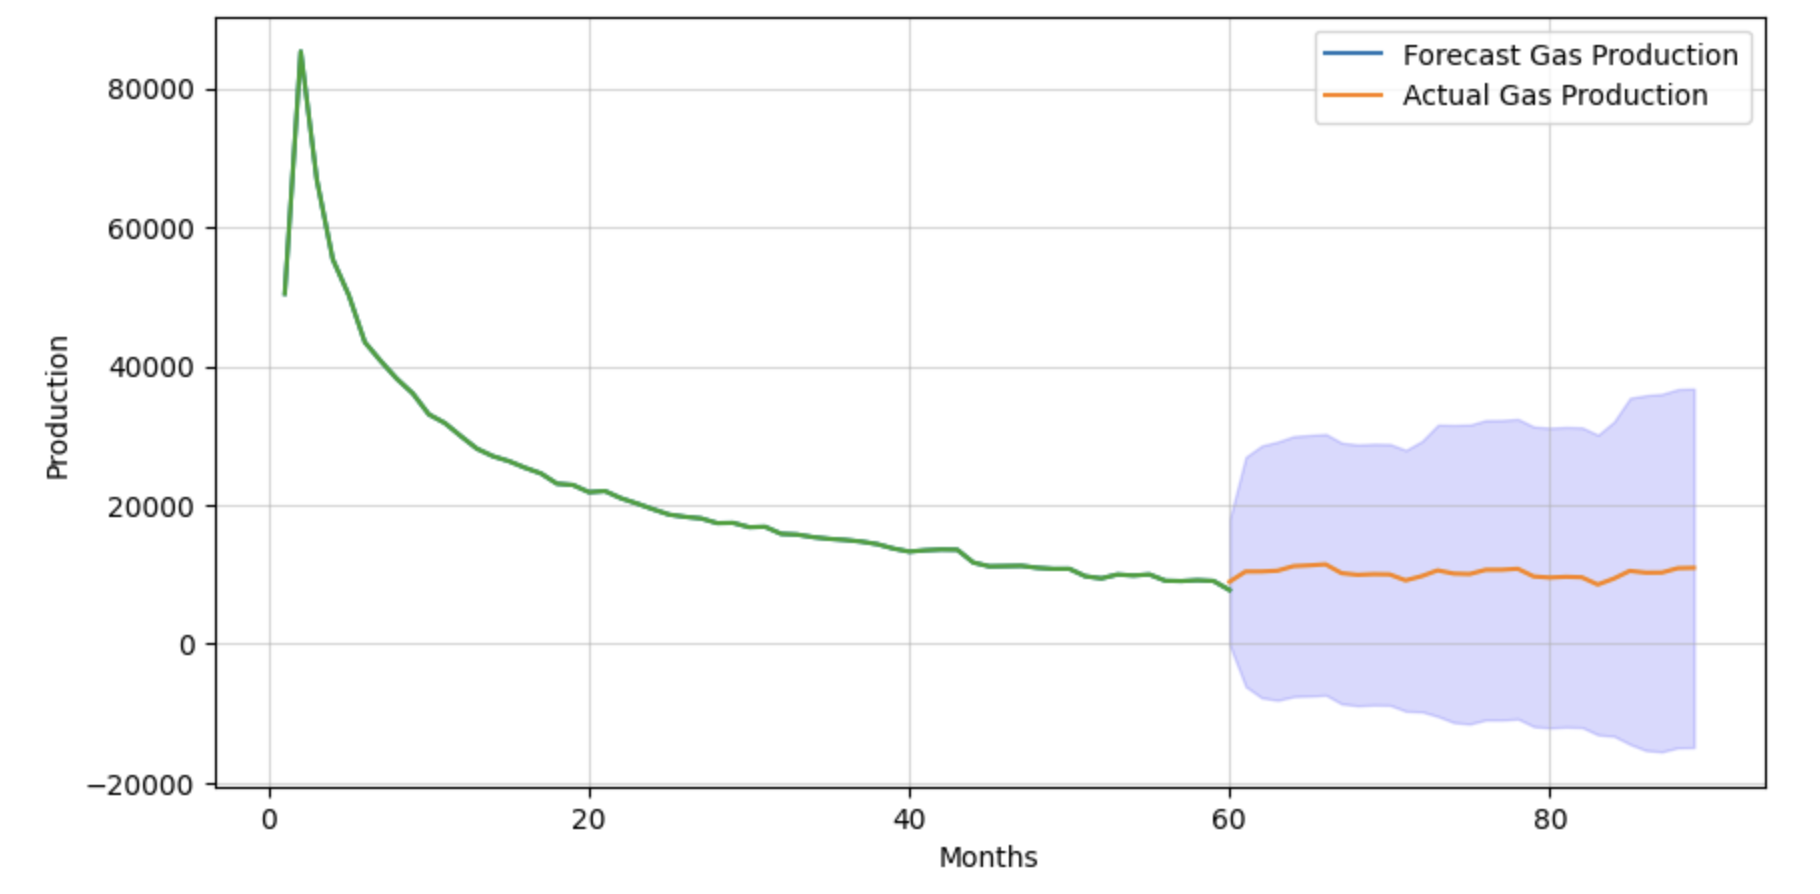

# Assumptions made

We have assumed and grouped the 'TotalProducingMonths' into bins and classified on Production Category. It has been observed that newly established wells exhibit higher producing capacities, and gradually stabilize and decrease over time. We have categorized the wells into New, Established, Matured and Outlier where the duration of production is 1 year, 3 years, 10 years and beyond 10 years respectively. This assumption simplifies the analysis process by grouping the wells into distinct Production Category based on production years.


# Limitations

The limitation of our model is the potential over-fitting that could occur. This is most likely due to SARIMAX tending to over-fit if the categorizing is not adequate. Another issue is the nature of oil and gas well's production. Since the majority of a well's production tends to peak in the first two years followed by a sharp decline, it is difficult to accuratley model this trend without over-fitting and assuming that this will always be the case.

Furthermore, tampering any parameters as well as the training data could cause the model to never converge or even more over-fitting. Due to its fragility, more time and data should be invested in order to improve the model. In conclusion, these limitations can be overcome given more time and resources.

# Data

We have taken the following datasets for analysis:
 - Production data
 - Metadata

## Dataset 1: Production Data



In [1]:
# Import library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import seaborn as sns
import matplotlib.colors as mcolors

# Set up cwd and datapath for future dataset loading
cwd = Path.cwd()
datapath = cwd

# Load in Production Data
prod_path = datapath.joinpath(Path('Production Data.xlsx'))
prod = pd.read_excel(prod_path)

/Users/its910/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Select key columns
prod_df = pd.DataFrame(prod)
key_col = ['API_UWI', 'TotalProdMonths', 'TotalCompletionMonths',
          'ProducingDays', 'Prod_BOE', 'Prod_MCFE',
          'LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL',
          'CumProd_BOE', 'CumProd_MCFE', 'CumLiquids_BBL',
          'CumGas_MCF', 'CumWater_BBL'
          ]
prod_df = prod_df[key_col]
prod_df.set_index('API_UWI', inplace=True)

In [3]:
# Check the dataset information
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106835 entries, 30-015-43920 to 30-025-50859
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   TotalProdMonths        106835 non-null  int64
 1   TotalCompletionMonths  106835 non-null  int64
 2   ProducingDays          106835 non-null  int64
 3   Prod_BOE               106835 non-null  int64
 4   Prod_MCFE              106835 non-null  int64
 5   LiquidsProd_BBL        106835 non-null  int64
 6   GasProd_MCF            106835 non-null  int64
 7   WaterProd_BBL          106835 non-null  int64
 8   CumProd_BOE            106835 non-null  int64
 9   CumProd_MCFE           106835 non-null  int64
 10  CumLiquids_BBL         106835 non-null  int64
 11  CumGas_MCF             106835 non-null  int64
 12  CumWater_BBL           106835 non-null  int64
dtypes: int64(13)
memory usage: 11.4+ MB


<b>The dataset contains 106,835 entries with 13 numerical columns. There is no missing values in all columns, and each column is of integer type. The columns represent various aspects of well production, including total and cumulative months of production, producing days, quantities of oil, gas, and water produced in barrels or thousands of cubic feet, as well as cumulative production values for oil, gas, and water. The following provides a description of each of these columns.
</b>
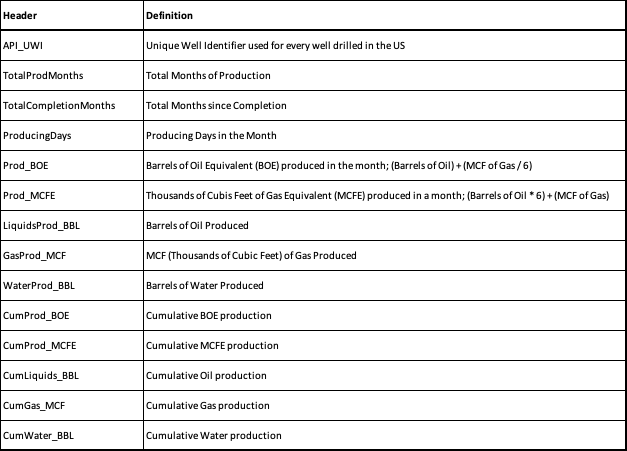

In [4]:
# Check the initial rows to get a sense of content
prod_df.head()

,TotalProdMonths,TotalCompletionMonths,ProducingDays,Prod_BOE,Prod_MCFE,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,CumProd_BOE,CumProd_MCFE,CumLiquids_BBL,CumGas_MCF,CumWater_BBL
API_UWI,,,,,,,,,,,,,
30-015-43920,1,1,31,0,0,0,0,214,0,0,0,0,214
30-015-43920,2,2,30,3552,21312,2234,7908,32876,3552,21312,2234,7908,33090
30-015-43920,3,3,31,35582,213491,26486,54575,110317,39134,234803,28720,62483,143407
30-015-43920,4,4,30,25530,153177,19121,38451,62834,64663,387980,47841,100934,206241
30-015-43920,5,5,31,20634,123803,15712,29531,48849,85297,511783,63553,130465,255090


<Axes: >

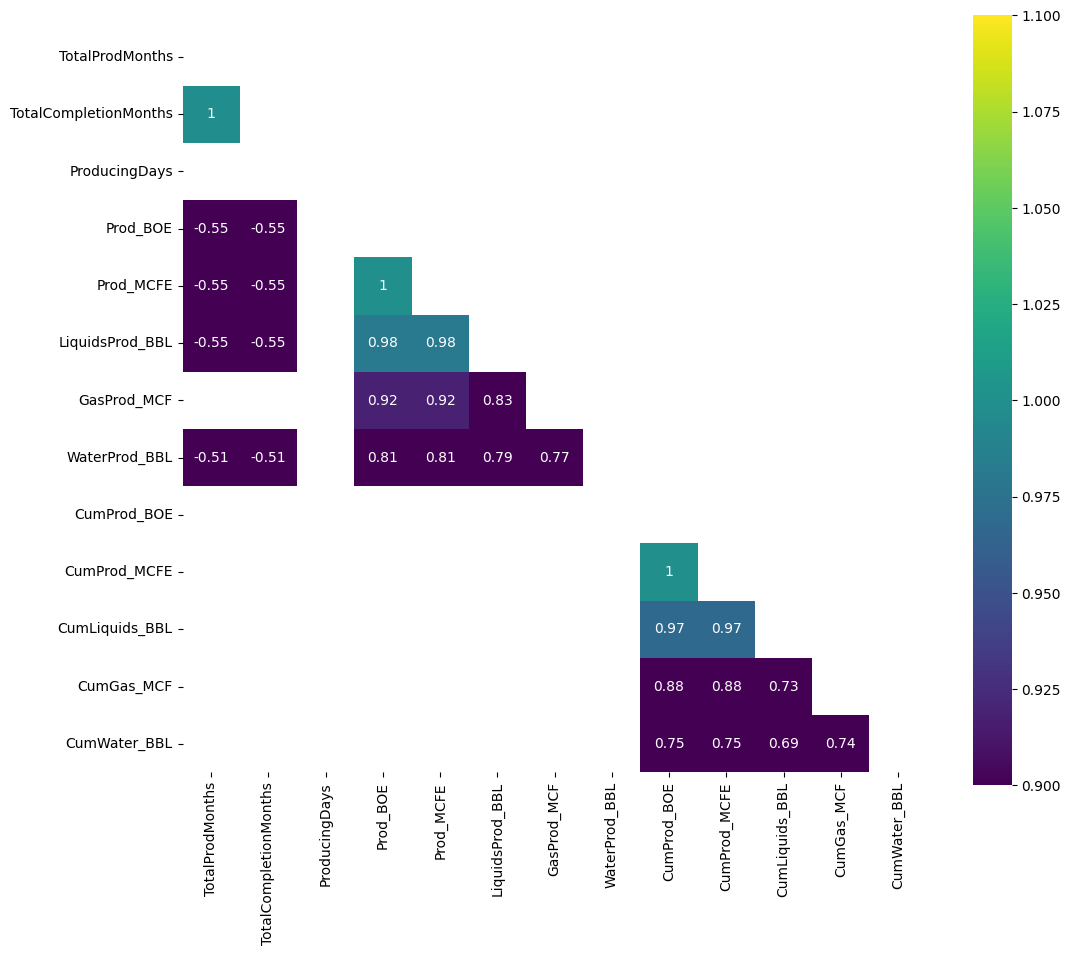

In [5]:
# Run the correlation between the production data
corr=prod_df.corr()
plt.figure(figsize=(12,10))

limit=0.5

mask=np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr[(corr>=limit) | (corr <=-limit)],
            cmap='viridis',
            vmax=1.0,
            mask=mask,
            vmin=1.0,
            annot=True,
            annot_kws={'size':10},
            square= True)

<b>In this matrix, our attention is directed towards variables exhibiting stronger correlations.</b>
- 'The correlation coefficient between 'Total Production Months' and 'Total Completion Months' is 1, indicating a perfect correlation or duplication. In order to mitigate redundancy, we have decided to eliminate 'Total Completion Months' from this dataset to simplify the columns.
- Regarding 'Production_BOE' and 'Production_MCFE,' these represent the same variable with different units. Both are closely associated with 'Liquids Production' and 'Gas Production.' Since our primary focus is on the last two variables as major factors (y), we choose to exclude both 'Production' variables.
- The cumulative columns also show a robust connection with liquids and gas production. However, our primary objective is to concentrate on the monthly performance of the well. Therefore, we will exclude all cumulative columns from this dataset.

In [6]:
# Drop columns relatively
prod_df = prod_df.drop(['TotalCompletionMonths', 'Prod_BOE', 'Prod_MCFE',
          'CumProd_BOE', 'CumProd_MCFE', 'CumLiquids_BBL',
          'CumGas_MCF', 'CumWater_BBL'
          ], axis =1)
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106835 entries, 30-015-43920 to 30-025-50859
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   TotalProdMonths  106835 non-null  int64
 1   ProducingDays    106835 non-null  int64
 2   LiquidsProd_BBL  106835 non-null  int64
 3   GasProd_MCF      106835 non-null  int64
 4   WaterProd_BBL    106835 non-null  int64
dtypes: int64(5)
memory usage: 4.9+ MB


## Dataset 2

In [7]:
# Load in metadata dataset
md_path = datapath.joinpath(Path('Metadata.xlsx'))
md = pd.read_excel(md_path)

In [8]:
# Select key columns, which are columns that have a description in the metadata
md_df = pd.DataFrame(md)
md_key_col = [
    'API_UWI',
    'TotalProducingMonths',
    'WHLiquids_PCT',
    'GOR_ScfPerBbl',
    'GammaRay_API',
    'BulkDensity_GPerCC',
    'Resistivity_OHMSM',
    'DensityPorosity_PCT',
    'EffectivePorosity_PCT',
    'ClayVolume_PCT',
    'NonClayVolume_PCT',
    'WaterSaturation_PCT',
    'PhiH_FT',
    'HCPV_PCT',
    'HeightOfHCPV_FT'
]

md_df = md_df[md_key_col]
md_df.set_index('API_UWI', inplace=True)

In [9]:
# Check the data information
md_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863 entries, 30-015-43706 to 30-025-45472
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalProducingMonths   2829 non-null   float64
 1   WHLiquids_PCT          2829 non-null   float64
 2   GOR_ScfPerBbl          2829 non-null   float64
 3   GammaRay_API           2826 non-null   float64
 4   BulkDensity_GPerCC     2826 non-null   float64
 5   Resistivity_OHMSM      2826 non-null   float64
 6   DensityPorosity_PCT    2826 non-null   float64
 7   EffectivePorosity_PCT  2826 non-null   float64
 8   ClayVolume_PCT         2826 non-null   float64
 9   NonClayVolume_PCT      2826 non-null   float64
 10  WaterSaturation_PCT    2826 non-null   float64
 11  PhiH_FT                2826 non-null   float64
 12  HCPV_PCT               2826 non-null   float64
 13  HeightOfHCPV_FT        2826 non-null   float64
dtypes: float64(14)
memory usage: 335.5+ KB


<b>We have a dataset with 2,843 entries and 14 different columns, provide information about well characteristics, production, and geological properties, including porosity, clay content, water saturation, and gas-to-oil ratio. We will use them for analyzing the performance of the wells.</b>
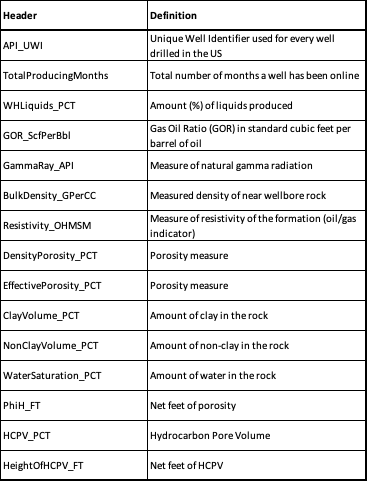

In [10]:
# Check the initial rows to get a sense of content
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
md_df.head()

,TotalProducingMonths,WHLiquids_PCT,GOR_ScfPerBbl,GammaRay_API,BulkDensity_GPerCC,Resistivity_OHMSM,DensityPorosity_PCT,EffectivePorosity_PCT,ClayVolume_PCT,NonClayVolume_PCT,WaterSaturation_PCT,PhiH_FT,HCPV_PCT,HeightOfHCPV_FT
API_UWI,,,,,,,,,,,,,,
30-015-43706,84.0,60.0,4047.0,61.08,2.60,94.67,0.064,0.055,0.15,0.80,0.52,12.17,0.029,6.5
30-025-44687,47.0,78.0,1654.0,70.40,2.55,174.31,0.093,0.075,0.16,0.76,0.39,11.33,0.043,6.6
30-025-46812,34.0,83.0,1232.0,74.89,2.56,90.51,0.080,0.061,0.21,0.72,0.46,18.81,0.032,9.9
30-025-44013,68.0,75.0,1953.0,73.86,2.56,91.03,0.088,0.073,0.17,0.76,0.59,6.20,0.031,2.6
30-015-49326,13.0,59.0,4148.0,81.37,2.59,181.22,0.073,0.060,0.20,0.73,0.41,12.87,0.035,7.6


In [11]:
# check if there is any null data
md_df.isna().sum()

TotalProducingMonths     34
WHLiquids_PCT            34
GOR_ScfPerBbl            34
GammaRay_API             37
BulkDensity_GPerCC       37
Resistivity_OHMSM        37
DensityPorosity_PCT      37
EffectivePorosity_PCT    37
ClayVolume_PCT           37
NonClayVolume_PCT        37
WaterSaturation_PCT      37
PhiH_FT                  37
HCPV_PCT                 37
HeightOfHCPV_FT          37
dtype: int64

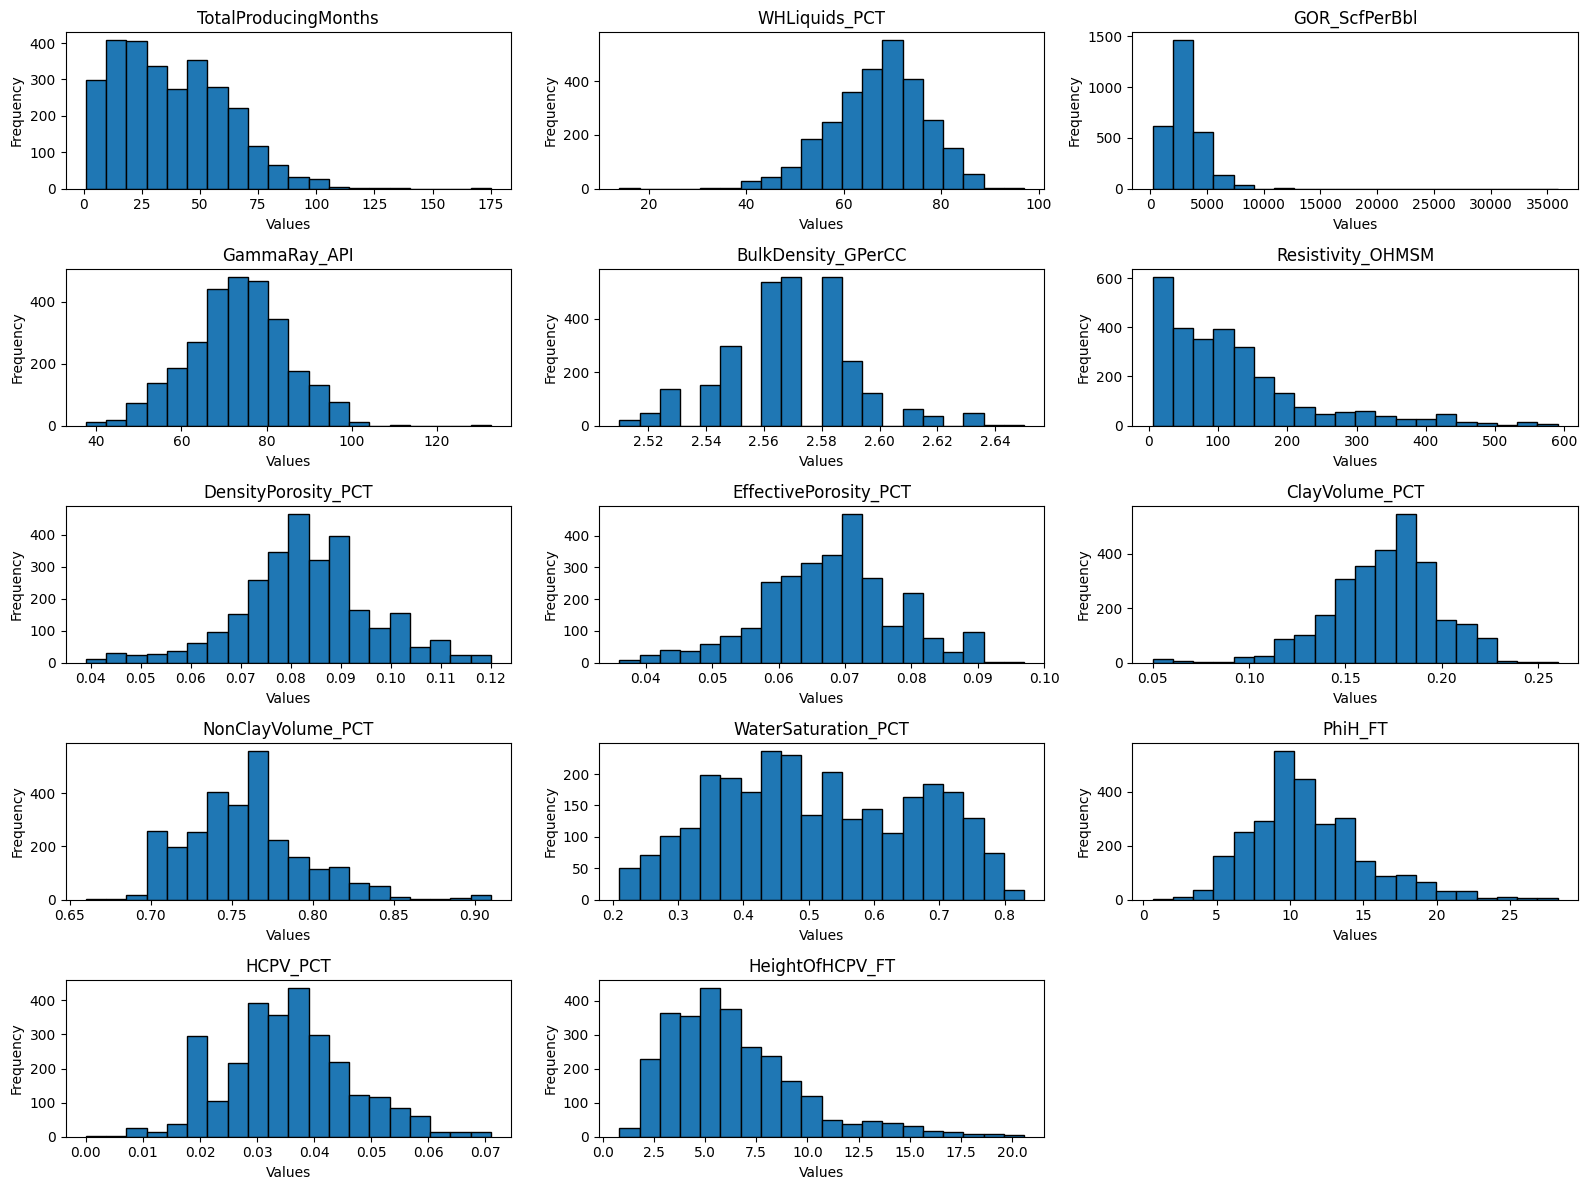

In [12]:
# Create the histogram to check the distribution of these variables
plt.figure(figsize=(16, 12))

num_subplots = len(md_df.columns)
num_cols = 3  
num_rows = -(-num_subplots // num_cols)  

# Create subplots
for i, col in enumerate(md_df.columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(md_df[col], bins=20, edgecolor='black') 
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<b>For the remaining columns with missing data, a majority exhibit a normal distribution. However, it is clear that most of them display either left or right skewness with some outliers. Therefore, we fill the null data with median instead of mean due to the skewed nature of the data.</b>

In [13]:
# Replace na values with the median of the value in a column
md_df.fillna(md_df.median(), inplace=True)
md_df.isna().sum()

TotalProducingMonths     0
WHLiquids_PCT            0
GOR_ScfPerBbl            0
GammaRay_API             0
BulkDensity_GPerCC       0
Resistivity_OHMSM        0
DensityPorosity_PCT      0
EffectivePorosity_PCT    0
ClayVolume_PCT           0
NonClayVolume_PCT        0
WaterSaturation_PCT      0
PhiH_FT                  0
HCPV_PCT                 0
HeightOfHCPV_FT          0
dtype: int64

<Axes: >

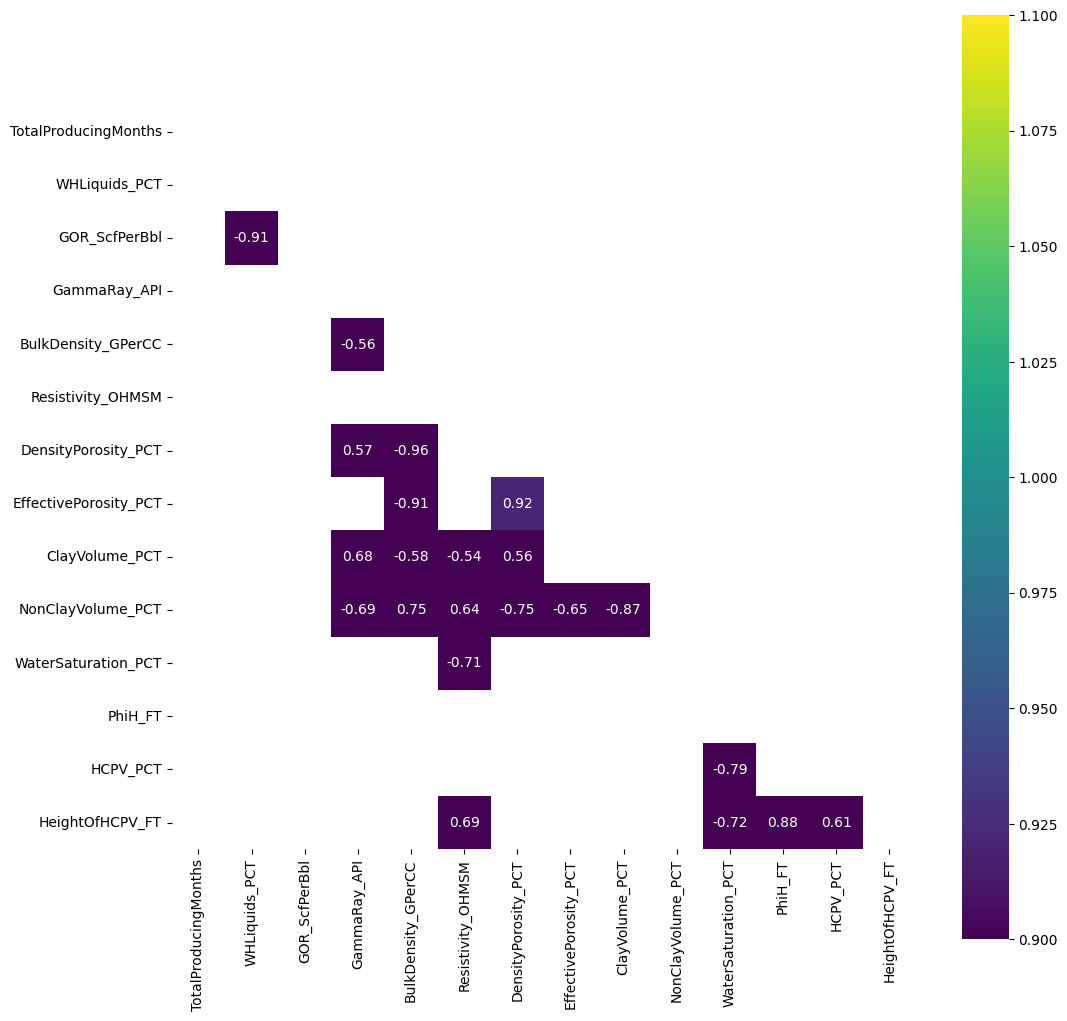

In [14]:
# Run the correlation between columns of Meta data
corr=md_df.corr()
plt.figure(figsize=(12,12))

limit=0.5

mask=np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr[(corr>=limit) | (corr <=-limit)],
            cmap='viridis',
            vmax=1.0,
            mask=mask,
            vmin=1.0,
            annot=True,
            annot_kws={'size':10},
            square= True)

<b>Building upon the previous steps, we have further refined the dataset by focusing on variables demonstrating stronger correlations to reduce redundancy.
As a result, we remove the columns named 'GOR_ScfPerBbl,' 'BulkDensity_GPerCC,' 'EffectivePorosity_PCT,' 'NonClayVolume_PCT,' 'WaterSaturation_PCT,' and 'HeightOfHCPV_FT.' </b>

In [15]:
md_df = md_df.drop([
        'GOR_ScfPerBbl', 
       'BulkDensity_GPerCC',
        'EffectivePorosity_PCT',
        'NonClayVolume_PCT', 
        'WaterSaturation_PCT', 
        'HeightOfHCPV_FT'
], axis =1)

md_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863 entries, 30-015-43706 to 30-025-45472
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TotalProducingMonths  2863 non-null   float64
 1   WHLiquids_PCT         2863 non-null   float64
 2   GammaRay_API          2863 non-null   float64
 3   Resistivity_OHMSM     2863 non-null   float64
 4   DensityPorosity_PCT   2863 non-null   float64
 5   ClayVolume_PCT        2863 non-null   float64
 6   PhiH_FT               2863 non-null   float64
 7   HCPV_PCT              2863 non-null   float64
dtypes: float64(8)
memory usage: 201.3+ KB


<b>To process the monthly prediction of oil and gas production, we chose 'Total Producing Months' as the time series variable. It enables our ability to make more accurate and insightful predictions of production trends over time.</b>

In [16]:
# Group data based on totalp production months
md_df['ProductionCategory'] = pd.cut(md_df['TotalProducingMonths'],
                                    bins=[-1, 12, 36, 60, float('inf')],
                                    labels=['New', 'Established', 'Mature', 'Very Mature'])

md_df = md_df.drop('TotalProducingMonths', axis = 1)
md_df.head()

,WHLiquids_PCT,GammaRay_API,Resistivity_OHMSM,DensityPorosity_PCT,ClayVolume_PCT,PhiH_FT,HCPV_PCT,ProductionCategory
API_UWI,,,,,,,,
30-015-43706,60.0,61.08,94.67,0.064,0.15,12.17,0.029,Very Mature
30-025-44687,78.0,70.40,174.31,0.093,0.16,11.33,0.043,Mature
30-025-46812,83.0,74.89,90.51,0.080,0.21,18.81,0.032,Established
30-025-44013,75.0,73.86,91.03,0.088,0.17,6.20,0.031,Very Mature
30-015-49326,59.0,81.37,181.22,0.073,0.20,12.87,0.035,Established


In [17]:
# Check the amount for each production category
md_df['ProductionCategory'].value_counts()

ProductionCategory
Established    1083
Mature          851
Very Mature     497
New             432
Name: count, dtype: int64

# Problem Solving

In this session, we will use SARIMAX to run the prediction of production.

In [18]:
# Grab only the mature wells from metadata
mature_df = md_df.loc[md_df['ProductionCategory'] == 'Mature']
mature_df.shape

(851, 8)

In [19]:
from sklearn.model_selection import train_test_split
# Split dataset into training wells and test wells

train, test = train_test_split(
            mature_df,
            test_size    = 0.2,
            random_state = 219)

In [20]:
train.shape

(680, 8)

In [21]:
# Merge datasets to get production data of mature wells
train_df = pd.merge(train, prod_df, on='API_UWI', how='inner')
test_df = pd.merge(test, prod_df, on='API_UWI', how='inner')
train_df.shape

(33218, 13)

In [22]:
train_df.head()

,WHLiquids_PCT,GammaRay_API,Resistivity_OHMSM,DensityPorosity_PCT,ClayVolume_PCT,PhiH_FT,HCPV_PCT,ProductionCategory,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
API_UWI,,,,,,,,,,,,,
30-025-45280,87.0,72.52,49.76,0.08,0.18,0.64,0.02,Mature,1,10,8700,6199,20645
30-025-45280,87.0,72.52,49.76,0.08,0.18,0.64,0.02,Mature,2,31,44270,38050,53113
30-025-45280,87.0,72.52,49.76,0.08,0.18,0.64,0.02,Mature,3,31,27048,26423,24660
30-025-45280,87.0,72.52,49.76,0.08,0.18,0.64,0.02,Mature,4,29,19341,14078,16502
30-025-45280,87.0,72.52,49.76,0.08,0.18,0.64,0.02,Mature,5,31,17400,10534,13893


In [23]:
train_df = train_df.drop('ProductionCategory', axis = 1)
test_df = test_df.drop('ProductionCategory', axis = 1)

In [24]:
# Analyze skewness of features
skew = train_df.skew()
right_skewed_cols = skew[skew > 2].index
right_skewed_cols

Index(['LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL'], dtype='object')

In [25]:
left_skewed_cols = skew[skew < -2].index
left_skewed_cols

Index(['ProducingDays'], dtype='object')

Text(0, 0.5, 'Gas (MCF)')

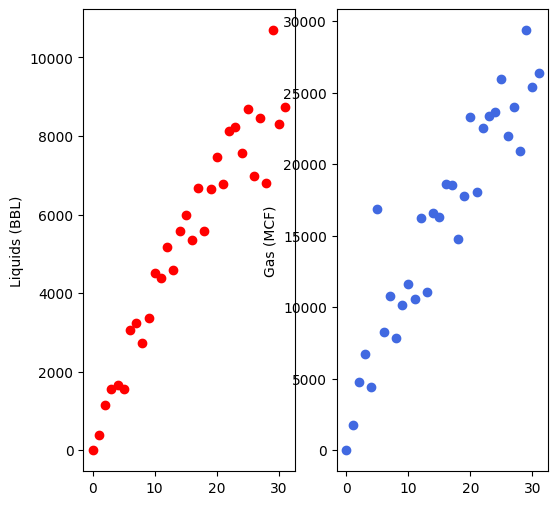

In [26]:
skew1 = train_df.groupby('ProducingDays')['LiquidsProd_BBL'].mean()
skew2 = train_df.groupby('ProducingDays')['GasProd_MCF'].mean()

# Create subplots for the first set of graphs
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

# Liquids subplot for the first set
axs[0].scatter(skew1.index, skew1.values, color='red')
axs[0].set_ylabel('Liquids (BBL)')

# Gas subplot for the first set
axs[1].scatter(skew2.index, skew2.values, color='royalblue')
axs[1].set_ylabel('Gas (MCF)')

In [27]:
# Analyze skewness of features
skew = test_df.skew()
right_skewed_cols = skew[skew > 2].index
right_skewed_cols

Index(['LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL'], dtype='object')

In [28]:
left_skewed_cols = skew[skew < -2].index
left_skewed_cols

Index(['ProducingDays'], dtype='object')

<b>Since the overall trend between the production values and producing days in a somewhat linear manner, it does not seem necessary to do any transformations to fix for skew.</b>

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit and transform the scaler on training data and test data
sc_train_df = sc.fit_transform(train_df)
col_names = train_df.columns
sc_train_df = pd.DataFrame(sc_train_df, columns=col_names)
sc_train_df.head()

,WHLiquids_PCT,GammaRay_API,Resistivity_OHMSM,DensityPorosity_PCT,ClayVolume_PCT,PhiH_FT,HCPV_PCT,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,2.178851,-0.114022,-0.638571,-0.325953,0.428191,-2.626767,-1.358385,-1.642023,-3.202653,0.057735,-0.731694,-0.125834
1,2.178851,-0.114022,-0.638571,-0.325953,0.428191,-2.626767,-1.358385,-1.574751,0.437631,3.833773,0.537737,1.101564
2,2.178851,-0.114022,-0.638571,-0.325953,0.428191,-2.626767,-1.358385,-1.507480,0.437631,2.005520,0.074339,0.025947
3,2.178851,-0.114022,-0.638571,-0.325953,0.428191,-2.626767,-1.358385,-1.440209,0.090937,1.187361,-0.417674,-0.282453
4,2.178851,-0.114022,-0.638571,-0.325953,0.428191,-2.626767,-1.358385,-1.372937,0.437631,0.981309,-0.558922,-0.381082


In [30]:
sc_test_df = sc.fit_transform(test_df)
col_names = test_df.columns
sc_test_df = pd.DataFrame(sc_test_df, columns=col_names)
sc_test_df.head()

,WHLiquids_PCT,GammaRay_API,Resistivity_OHMSM,DensityPorosity_PCT,ClayVolume_PCT,PhiH_FT,HCPV_PCT,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,-0.734707,-0.206848,-0.484313,0.638824,-0.552927,-0.115302,0.24251,-1.641606,-1.168998,1.347639,0.672925,2.125618
1,-0.734707,-0.206848,-0.484313,0.638824,-0.552927,-0.115302,0.24251,-1.574284,0.440522,8.963703,6.608822,8.203750
2,-0.734707,-0.206848,-0.484313,0.638824,-0.552927,-0.115302,0.24251,-1.506962,0.261686,7.639232,5.445239,5.663030
3,-0.734707,-0.206848,-0.484313,0.638824,-0.552927,-0.115302,0.24251,-1.439640,0.440522,5.705686,5.004412,4.299679
4,-0.734707,-0.206848,-0.484313,0.638824,-0.552927,-0.115302,0.24251,-1.372318,0.440522,3.962919,3.444436,3.250422


In [31]:
# Aggregate for model speed
train_df = train_df.groupby('TotalProdMonths').mean()
test_df = test_df.groupby('TotalProdMonths').mean()

In [32]:
train_df.head()

,WHLiquids_PCT,GammaRay_API,Resistivity_OHMSM,DensityPorosity_PCT,ClayVolume_PCT,PhiH_FT,HCPV_PCT,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
TotalProdMonths,,,,,,,,,,,
1,67.238586,73.766922,118.860515,0.083912,0.169381,11.103623,0.034975,23.095729,23009.533137,50421.310751,66281.393225
2,67.238586,73.766922,118.860515,0.083912,0.169381,11.103623,0.034975,29.269514,37488.195876,85303.571429,91948.817378
3,67.238586,73.766922,118.860515,0.083912,0.169381,11.103623,0.034975,28.985272,28326.568483,66863.328424,66658.434462
4,67.238586,73.766922,118.860515,0.083912,0.169381,11.103623,0.034975,28.435935,22709.057437,55377.163476,53632.846834
5,67.238586,73.766922,118.860515,0.083912,0.169381,11.103623,0.034975,28.499264,19315.905744,50220.846834,47757.301915


In [33]:
# Split into x and y
# For Gas Production
gas_train = train_df['GasProd_MCF']
gas_train = pd.DataFrame(gas_train)
gas_test = test_df['GasProd_MCF']
gas_test = pd.DataFrame(gas_test)
# For Oil Production
oil_train = train_df[ 'LiquidsProd_BBL']
oil_train = pd.DataFrame(oil_train)
oil_test = test_df['LiquidsProd_BBL']
oil_test = pd.DataFrame(oil_test)

# Remove production variables from train to make external indicators for model
x = train_df.drop(['GasProd_MCF', 'WaterProd_BBL', 'LiquidsProd_BBL'], axis = 1)

In [34]:
x.shape

(60, 8)

In [35]:
gas_train.shape

(60, 1)

In [36]:
gas_train.head()

,GasProd_MCF
TotalProdMonths,
1,50421.310751
2,85303.571429
3,66863.328424
4,55377.163476
5,50220.846834


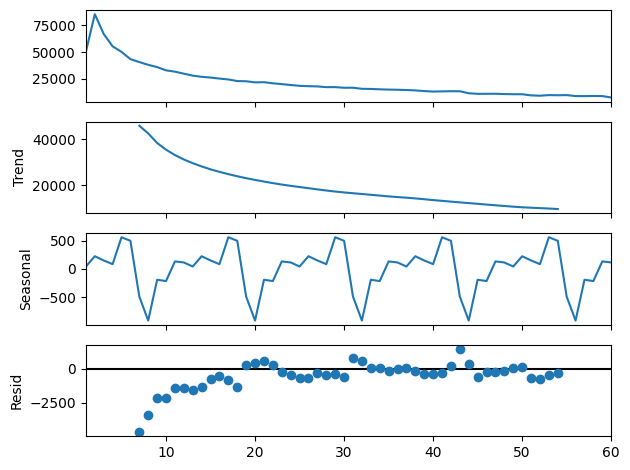

In [37]:
# Check the decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(gas_train, model='additive', period=12)  # Use 'multiplicative' if appropriate

result.plot()
plt.show()

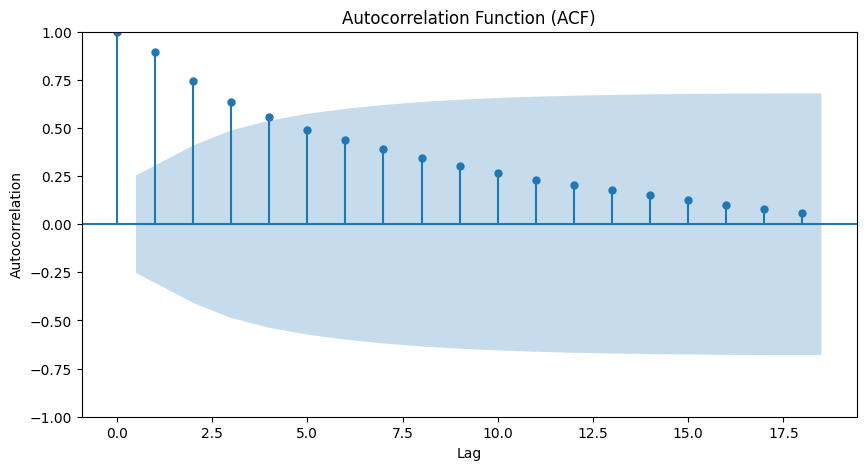

In [38]:
# Confirm seasonal patterns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(gas_train, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [39]:
import itertools
import math
# Import statsmodels library
import statsmodels.api as sm

In [40]:
# GAS MODEL
# grid search with extrenous data

# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 2)  # Autoregressive order
d_values = [0]  # Differencing order
q_values = range(0, 2)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 2)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

ei = [x, None]

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values,
                                            ei))

for params in param_combinations:
    order = params[:3]  # (p, d, q)
    seasonal_order = params[3:7]  # (P, D, Q, m)
    exog_data = params[-1]  # This should be 'x', the external regressor data

    try:
        # Ensure 'exog_data' is directly pointing to 'x' or equivalent structured data
        gas_model = sm.tsa.SARIMAX(gas_train, 
                                   order=order, 
                                   seasonal_order=seasonal_order,
                                   exog=exog_data,  # Use the correctly defined 'x'
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
        result = gas_model.fit(disp=False)
        aic = result.aic
        
        if aic < best_aic and aic > 200:  # Your condition to filter based on AIC
            best_aic = aic
            best_params = params

    except Exception as e:
        print(f"Model failed to converge for parameters")

/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided 

In [41]:
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

Best Parameters: (1, 0, 1, 1, 1, 0, 12, None)
Best AIC: 525.9086753779382


In [42]:
gas_model = sm.tsa.SARIMAX(gas_train,
                       order=best_params[:3],
                       seasonal_order=best_params[3:-1],
                       exog=best_params[-1])
result = gas_model.fit(disp=False)

# Show the summary
result.summary()

/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         GasProd_MCF   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -474.789
Date:                             Wed, 21 Feb 2024   AIC                            957.578
Time:                                     22:47:52   BIC                            965.063
Sample:                                          0   HQIC                           960.407
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5432      0.147      3.687      0.000       0.254       0.832
ma.L1          1.0000      0.155      6.456      0.000       0.696       1.304
ar.S.L12      -0.4358      0.040    -10.963      0.000      -0.514      -0.358
sigma2      2.099e+07   7.38e-09   2.85e+15      0.000     2.1e+07     2.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               421.64
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -3.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+30. Standard errors may be unstable.
"""

Enter the number of months for forecast: 30


/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


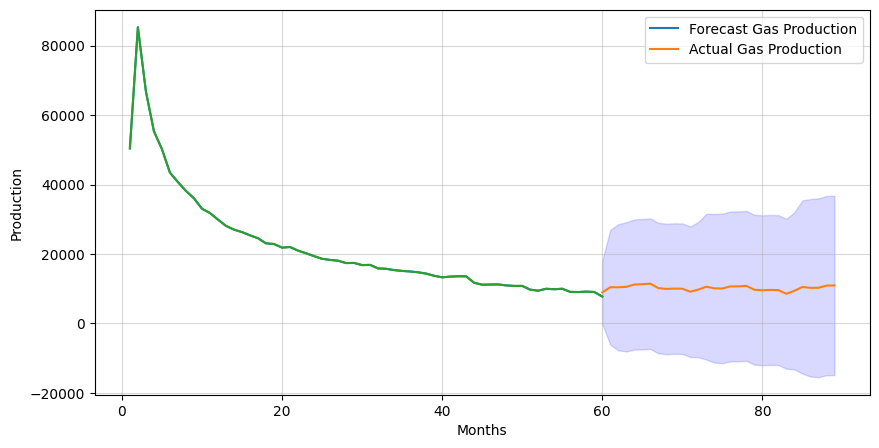

In [43]:
# FORECASTING MODEL
steps_input = input("Enter the number of months for forecast: ")
try:
    steps = int(steps_input)  # Convert input to integer
except ValueError:
    print("Please enter a valid integer for steps.")
    raise
    
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast with training data
ax = gas_train.plot(figsize=(10,5))
forecast_values.plot()
gas_train.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower GasProd_MCF'], 
                 confidence_intervals['upper GasProd_MCF'], 
                 color='blue',
                 alpha=0.15)
plt.legend([ 'Forecast Gas Production', 
            'Actual Gas Production'], 
           loc='upper right')
plt.xlabel('Months')
plt.ylabel('Production')
plt.grid(alpha=0.5)
plt.show()

In [44]:
p_values = range(0, 2)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 2)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 2)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

ei = [x, None]

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values,
                                            ei))

for params in param_combinations:
    order = params[:3] 
    seasonal_order = params[3:7]  
    exog_data = params[-1]  

    try:

        oil_model = sm.tsa.SARIMAX(oil_train, 
                                   order=order, 
                                   seasonal_order=seasonal_order,
                                   exog=exog_data,  
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
        result = oil_model.fit(disp=False)
        aic = result.aic
        
        if aic < best_aic and aic > 200: 
            best_aic = aic
            best_params = params

    except Exception as e:
        print(f"Model failed to converge for parameters {params}: {e}")


/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided 

In [45]:
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

Best Parameters: (1, 0, 0, 1, 1, 0, 12, None)
Best AIC: 450.5460744404724


In [46]:
oil_model = sm.tsa.SARIMAX(oil_train,
                       order=best_params[:3],
                       seasonal_order=best_params[3:-1],
                       exog=best_params[-1])
result = oil_model.fit(disp=False)

# Show the summary
result.summary()

/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    LiquidsProd_BBL   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -456.487
Date:                            Wed, 21 Feb 2024   AIC                            918.975
Time:                                    22:48:23   BIC                            924.589
Sample:                                         0   HQIC                           921.096
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6957      0.037     18.920      0.000       0.624       0.768
ar.S.L12      -0.5096      0.022    -22.898      0.000      -0.553      -0.466
sigma2      6.731e+06   1.03e-09   6.51e+15      0.000    6.73e+06    6.73e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.17   Jarque-Bera (JB):               155.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Enter the number of months for forecast: 30


/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/its910/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


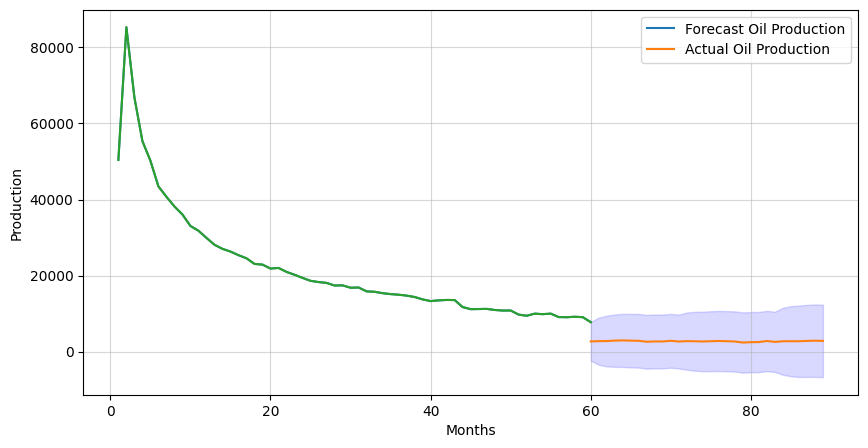

In [47]:
steps_input = input("Enter the number of months for forecast: ")
try:
    steps = int(steps_input)  # Convert input to integer
except ValueError:
    print("Please enter a valid integer for steps.")
    raise
    
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast with training data
ax = gas_train.plot(figsize=(10,5))
forecast_values.plot()
gas_train.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower LiquidsProd_BBL'], 
                 confidence_intervals['upper LiquidsProd_BBL'], 
                 color='blue',
                 alpha=0.15)
plt.legend([ 'Forecast Oil Production', 
            'Actual Oil Production'], 
           loc='upper right')
plt.xlabel('Months')
plt.ylabel('Production')
plt.grid(alpha=0.5)
plt.show()

In [48]:
forecast_values

60    2697.854219
61    2760.737683
62    2785.434101
63    2909.481193
64    2960.572063
65    2894.493074
66    2857.533326
67    2605.381502
68    2689.849838
69    2683.571930
70    2852.113933
71    2666.476379
72    2769.354081
73    2735.403041
74    2681.638125
75    2745.860771
76    2808.626384
77    2751.362528
78    2673.508237
79    2400.185702
80    2496.037181
81    2523.783412
82    2801.289826
83    2571.997454
84    2732.810781
85    2748.241342
86    2734.484811
87    2829.211182
88    2886.037754
89    2824.288926
Name: predicted_mean, dtype: float64